In [1]:
#load the dataset

In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import the csv data
data = pd.read_csv('SuperStore_sales.csv')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
#check for null values
data.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code       True
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
dtype: bool

In [7]:
#found one null value - product id
#we will drop the null values
data = data.dropna(subset=['Postal Code'])


In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [9]:
data.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
dtype: bool

In [10]:
#check if dates are in correct format
invalid_dates = data[data['Order Date'].isna()]

In [11]:
invalid_dates # all dates are in correct format

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


<Axes: >

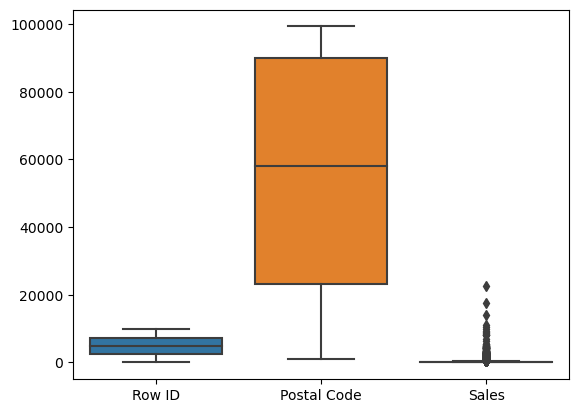

In [12]:
#outlier detection
sns.boxplot(data)

<Axes: >

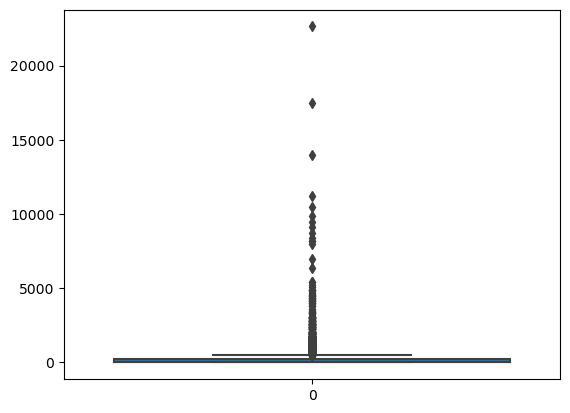

In [13]:
#we found outliers for sales column
sns.boxplot(data.Sales)

In [14]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Sales']=np.where(data['Sales']>upper_whisker,upper_whisker,np.where(data['Sales']<lower_whisker,lower_whisker,data['Sales']))

<Axes: >

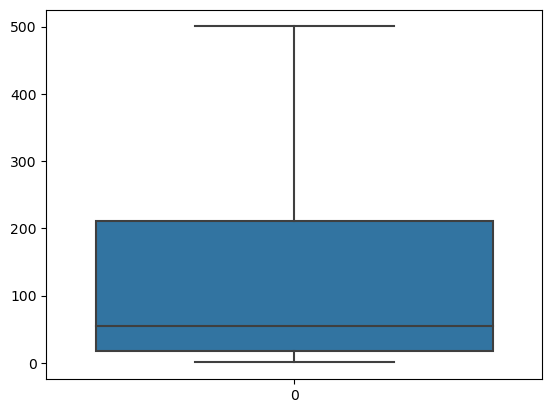

In [15]:
sns.boxplot(data.Sales)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [17]:
data.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,140.614676
std,2827.486899,32041.223413,169.301036
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,500.108000


In [18]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_23324\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Row ID,Postal Code,Sales
Row ID,1.000000,0.013645,-0.004795
Postal Code,0.013645,1.000000,-0.009628
Sales,-0.004795,-0.009628,1.000000


Sales by category

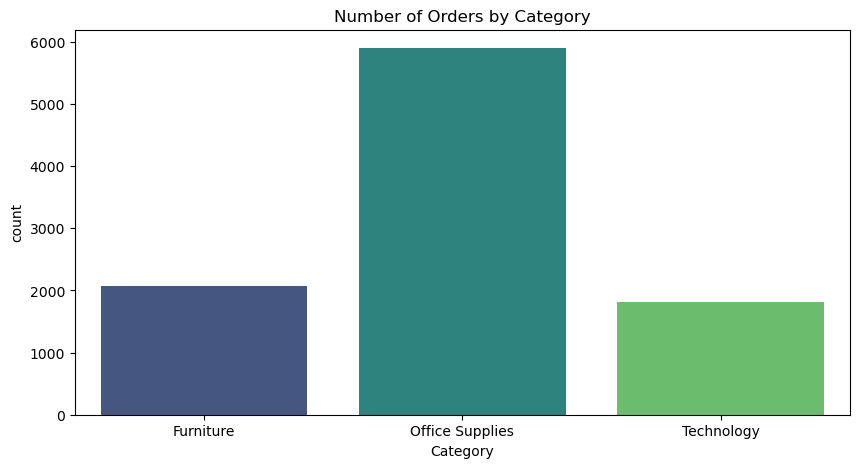

In [21]:
#we have categorical attributes in the data
plt.figure(figsize=(10, 5))
sns.countplot(data, x='Category', palette='viridis')
plt.title('Number of Orders by Category')
plt.show()


Sales by segment

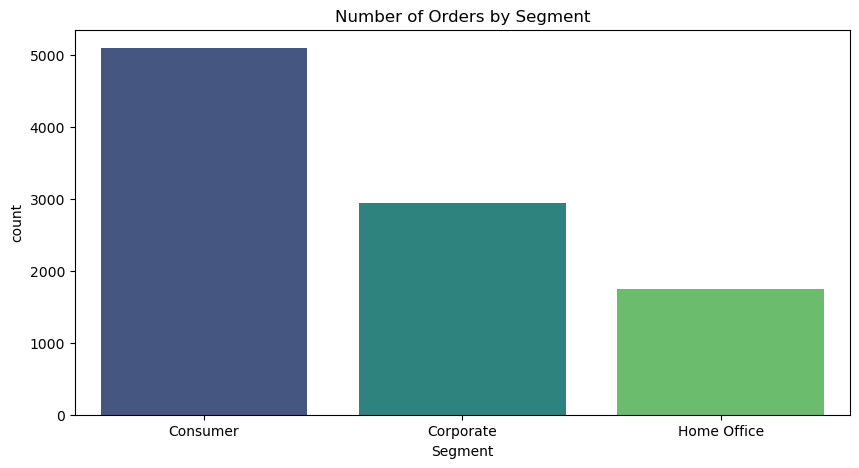

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data, x='Segment', palette='viridis')
plt.title('Number of Orders by Segment')
plt.show()


Sales by region

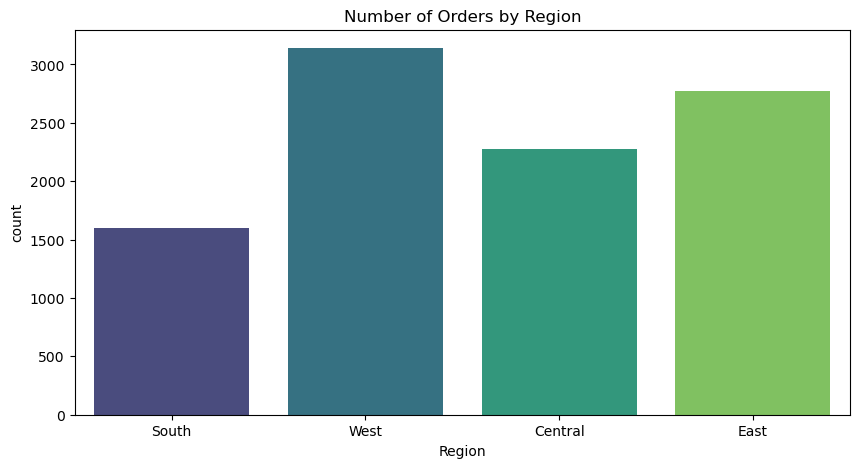

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(data, x='Region', palette='viridis')
plt.title('Number of Orders by Region')
plt.show()


sales distribution

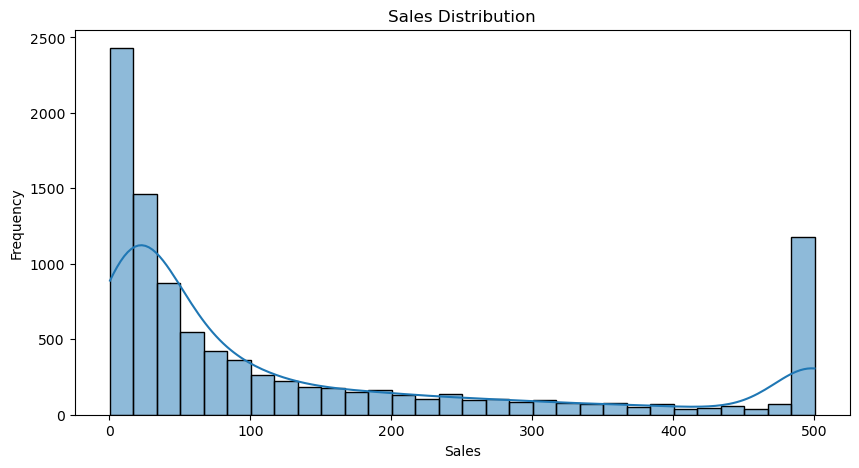

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


average sales by region and category

<Figure size 1200x600 with 0 Axes>

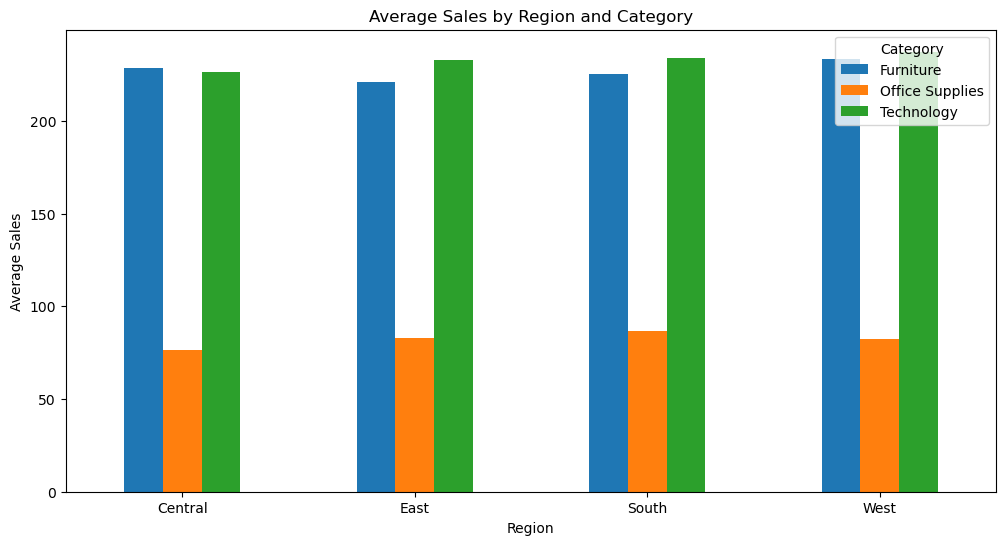

In [27]:
plt.figure(figsize=(12, 6))
avg_sales = data.groupby(['Region', 'Category'])['Sales'].mean().unstack()
avg_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Average Sales by Region and Category')
plt.ylabel('Average Sales')
plt.xlabel('Region')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.show()


monthly sales over time

Shipping Mode Counts:
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64


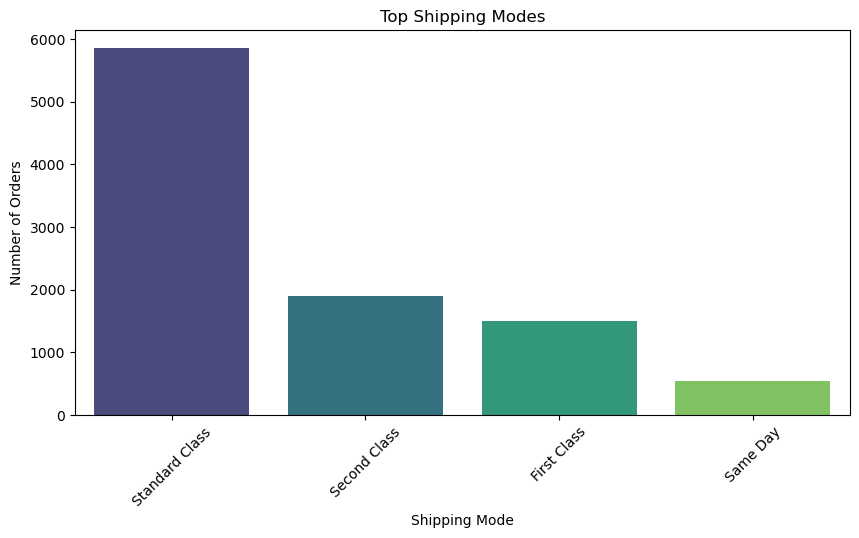

In [29]:
shipping_mode_counts = data['Ship Mode'].value_counts()

# Step 2: Print the results
print("Shipping Mode Counts:")
print(shipping_mode_counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=shipping_mode_counts.index, y=shipping_mode_counts.values, palette='viridis')
plt.title('Top Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

## Results from above graph:
### Standard class is the most preferred shipping mode

Which segment generates most sales

segment_counts
Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64


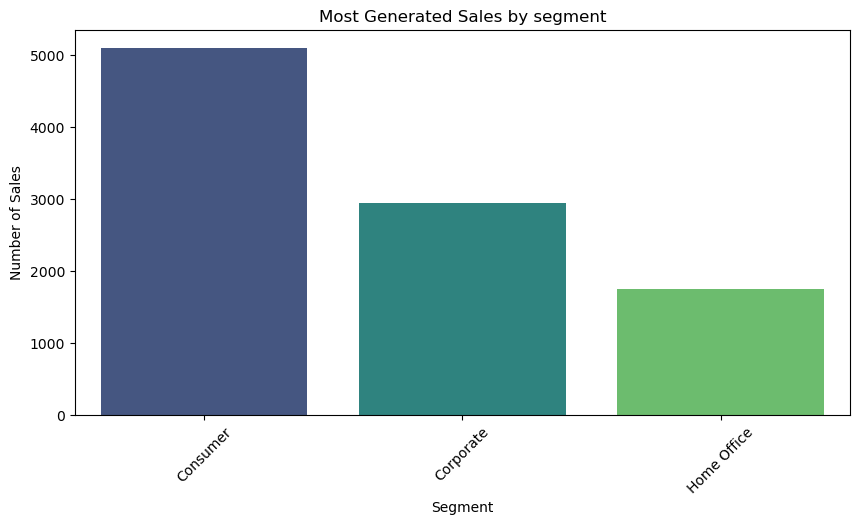

In [30]:
segment_counts = data['Segment'].value_counts()

# Step 2: Print the results
print("segment_counts")
print(segment_counts)
plt.figure(figsize=(10, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Most Generated Sales by segment')
plt.xlabel('Segment')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

### Result from above eda
### Consumer is the segment that is generating more sales

## check the sales are increasing or decreasing as per time

C:\Users\HP\AppData\Local\Temp\ipykernel_23324\3976073756.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


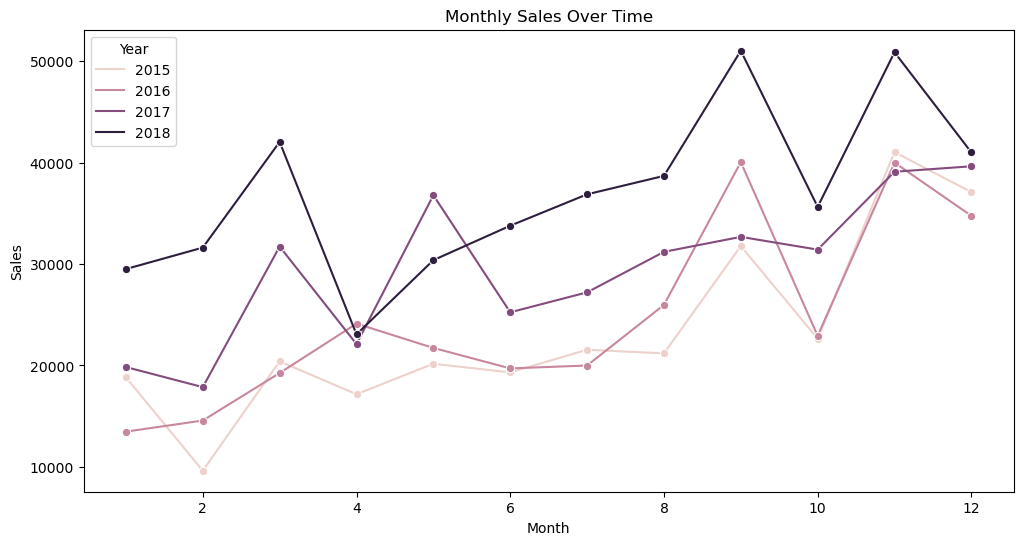

In [28]:
# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year and month
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# Group by Year and Month
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()


#### Results from above eda: Sales are increasing over time

profit distribution

In [35]:
#perform eda
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Trends
monthly_sales = data.groupby(df['Date'].dt.to_period('M')).sum()

# Plot Sales Over Time
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Sales')
plt.title('Monthly Sales Trends')
plt.show()


KeyError: 'Date'